In [ ]:
import pandas as pd

In [ ]:
cctv_seoul = pd.read_csv('./data/01. Seoul_CCTV.csv')
cctv_seoul.head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


Pandas data frame 의 구조
===

![222222.png](attachment:222222.png)

In [ ]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [ ]:
cctv_seoul.index

RangeIndex(start=0, stop=25, step=1)

In [ ]:
cctv_seoul.columns[0]

'기관명'

In [ ]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"}, inplace = True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [ ]:
pop_seoul = pd.read_excel("./data/01. Seoul_Population.xls")
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


### xlrd 모듈을 설치해야 엑셀파일을 불러올 수 있음.
### 엑셀에서 합쳐진 행, 열이 이상하게 나옴.

In [ ]:
pop_seoul = pd.read_excel("./data/01. Seoul_Population.xls", header = 2, usecols = "B,D,G,J,N")
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [ ]:
pop_seoul.rename(columns={pop_seoul.columns[0]:"구별",
                          pop_seoul.columns[1]:"인구수",
                          pop_seoul.columns[2]:"한국인",
                          pop_seoul.columns[3]:"외국인",
                          pop_seoul.columns[4]:"고령자",},
                inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


( ! 를 이용해 터미널 명령 가능 )
===

CCTV Data
===

In [ ]:
cctv_seoul.sort_values(by="소계", ascending=True).head(5)
# cctv 를 가장 적게 가진 서울의 구

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [ ]:
cctv_seoul.sort_values(by="소계", ascending=False).head(5)
# cctv 를 가장 많이 가진 서울의 구

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [ ]:
cctv_seoul["최근증가율"] = (
    (cctv_seoul["2014년"] + cctv_seoul["2015년"] +cctv_seoul["2016년"])
    / cctv_seoul["2013년도 이전"] * 100
)

cctv_seoul.sort_values(by="최근증가율", ascending=False).head(5)
# 최근 3년간 CCTV 증가율을 계산

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


인구데이터 정리
===

In [ ]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [ ]:
pop_seoul.drop([0], inplace=True) # 필요없는 행 지우기
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [ ]:
pop_seoul["구별"].unique() # unique 검사를 통해 데이터 확인. 중복되는 데이터는 1번씩만 표시.

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [ ]:
pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구수"] * 100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구수"] * 100
pop_seoul.head()
# 외국인과 고령자의 비율 만들기

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [ ]:
pop_seoul.sort_values(by="인구수", ascending=False).head(5)
# 서울에서 인구가 가장 믾은 구

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [ ]:
pop_seoul.sort_values(by="외국인", ascending=False).head(5)
# 서울에서 외국인이 가장 믾은 구

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [ ]:
pop_seoul.sort_values(by="외국인비율", ascending=False).head(5)
# 서울에서 외국인비율이 높은 구

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [ ]:
pop_seoul.sort_values(by="고령자", ascending=False).head(5)
# 서울에서 고령자이 가장 믾은 구

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [ ]:
pop_seoul.sort_values(by="고령자비율", ascending=False).head(5)
# 서울에서 고령자비율이 높은 구

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


데이터 합치기
===

In [ ]:
data_result = pd.merge(cctv_seoul,pop_seoul, on = "구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [ ]:
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
data_result.head()
# 필요 없는 컬럼 지우기

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [ ]:
data_result.set_index("구별", inplace=True) # 인덱스 바꾸기
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


데이터 간 상관관계
===

In [ ]:
data_result.corr() # 상관계수를 찾을 수 있다.

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


* 인구수와 cctv 개수의 상관계수는 약 0.233 정도이다.

In [ ]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.sort_values(by="CCTV비율", ascending=False).head(5)
# CCTV 비율 만들기

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [ ]:
data_result.sort_values(by="CCTV비율", ascending=True).head(5)
# CCTV 비율이 낮은 구

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


데이터 가시화
===

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
get_ipython().run_line_magic("matplotlib","inline")

In [ ]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<Axes: ylabel='구별'>

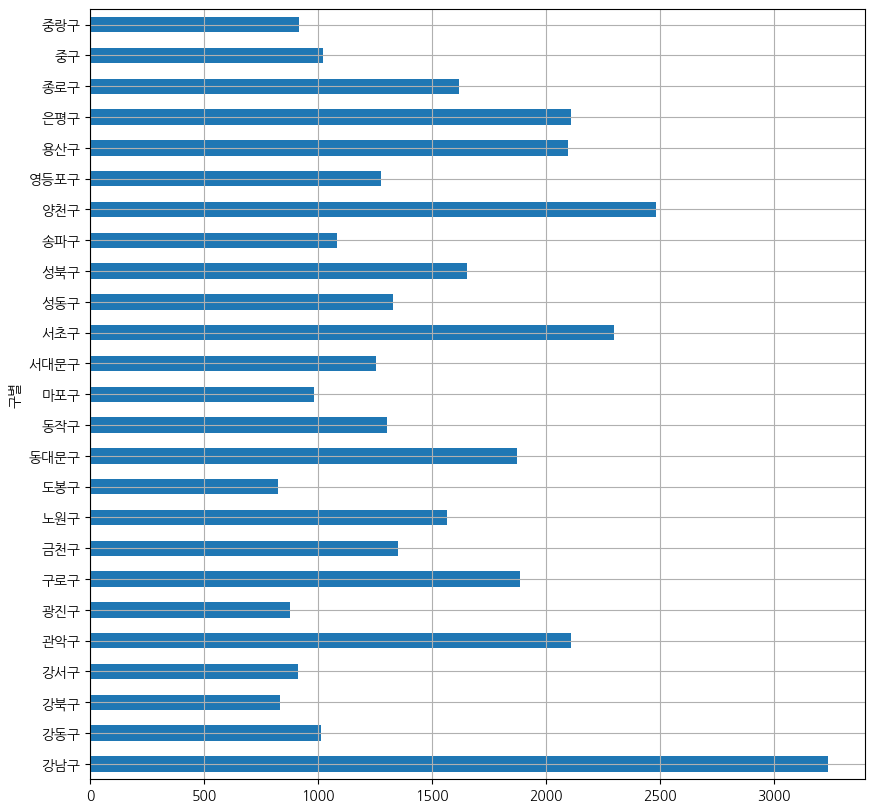

In [ ]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10,10))

In [ ]:
def drawGraph6(): # 정렬해서 가시화
    data_result["소계"].sort_values().plot(kind="barh", grid=True, figsize=(10,10))

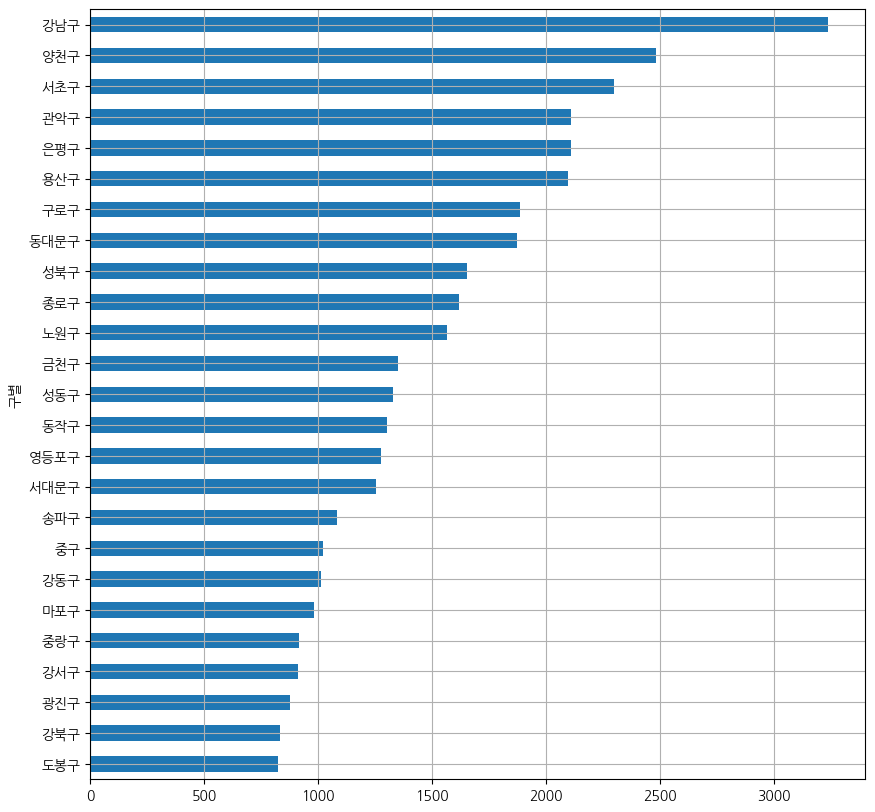

In [ ]:
drawGraph6()

In [ ]:
def drawGraph7():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"], s = 50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()


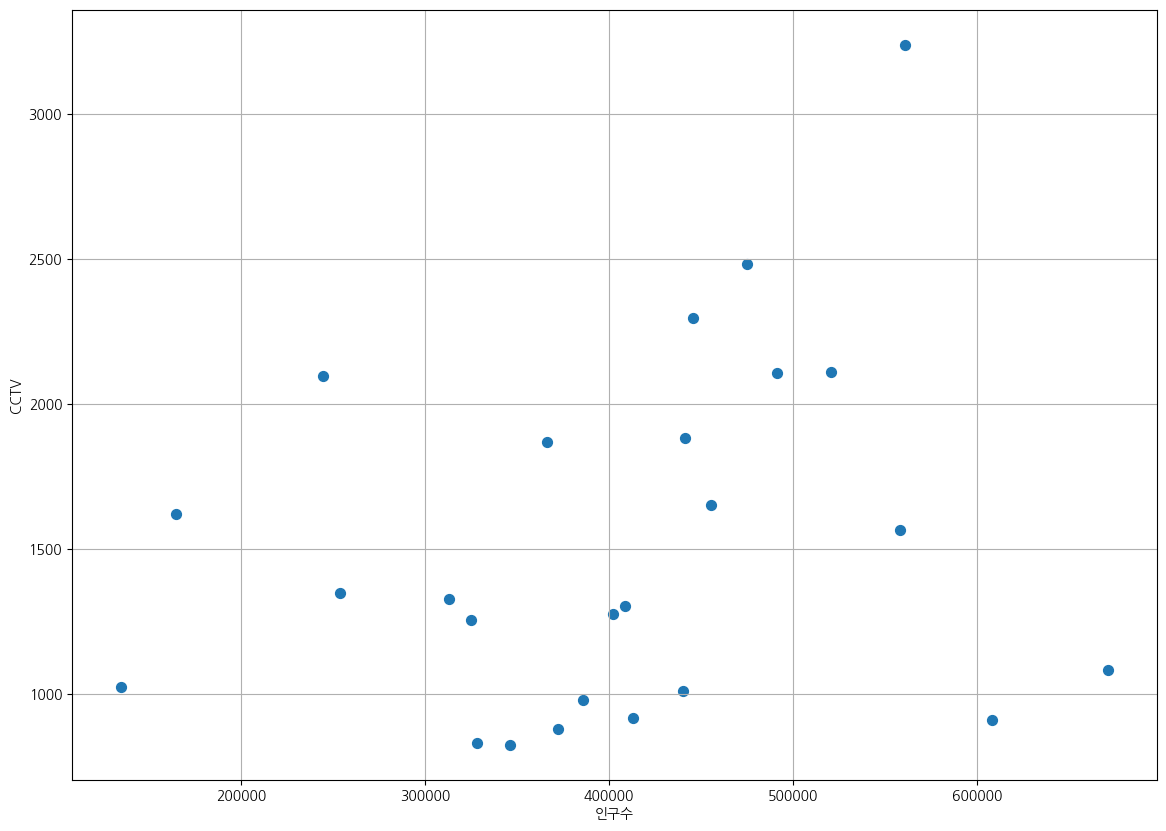

In [ ]:
drawGraph7()

In [ ]:
import numpy as np

fp1 = np.polyfit(data_result["인구수"],data_result["소계"],1) # 1차 polyfit 계산
fp1
# poly1d : polyfit 으로 찾은 계수로 python 에서 사용 할 함수로 만들어줌

array([1.11155868e-03, 1.06515745e+03])

In [ ]:
f1 = np.poly1d(fp1)

In [ ]:
f1(400000) #인구가 400000명일 때 cctv 개수?

1509.7809252413333

In [ ]:
fx = np.linspace(100000, 700000, 100)

In [ ]:
def drawGraph8():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx,f1(fx), ls = "dashed", lw=3, color = "g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()


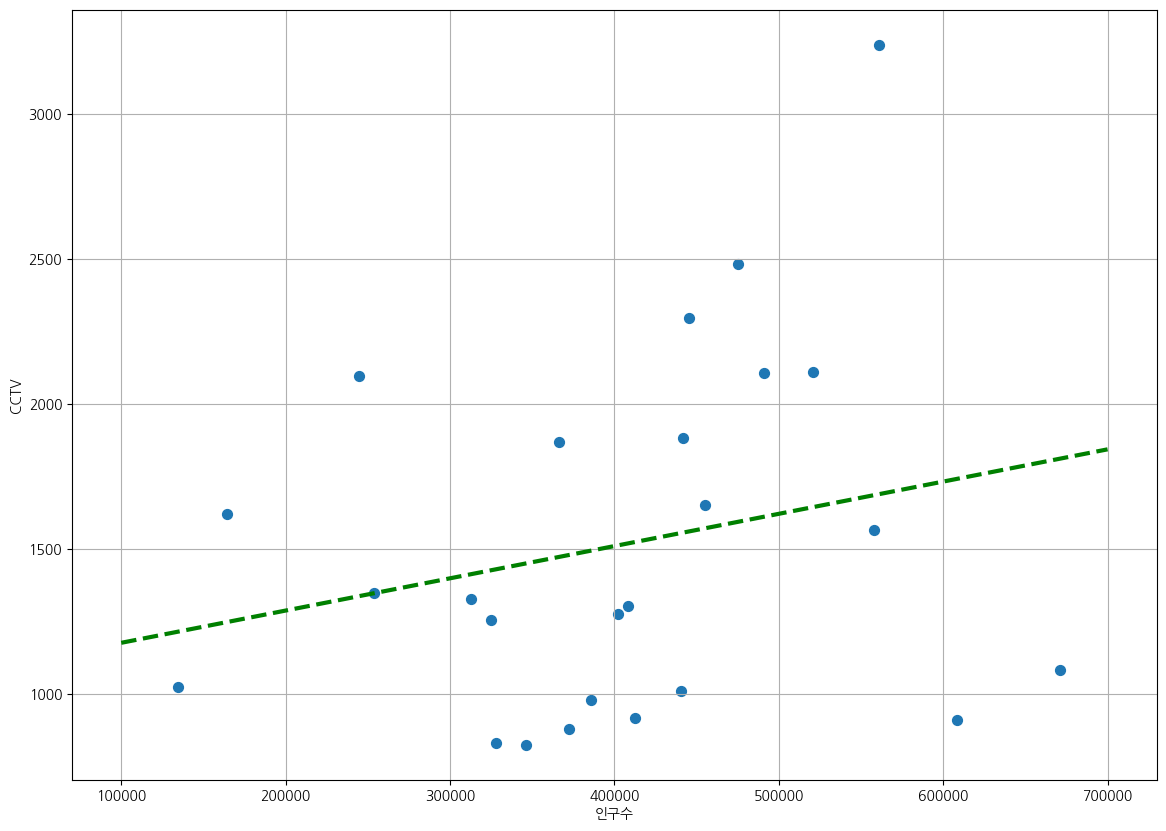

In [ ]:
drawGraph8()

In [ ]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"]) # 오차
# 경향과 비교해서 오차가 큰 데이터 계산
df_descending = data_result.sort_values(by="오차", ascending=False)
df_ascending = data_result.sort_values(by="오차", ascending=True)

In [ ]:
df_descending.head() # 경향대비 CCTV 가 많은 구

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [ ]:
df_ascending.head() # 경향대비 CCTV 가 적은 구

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


미리색상지정
===

In [ ]:
from matplotlib.colors import ListedColormap

# colormap 사용자 지정
color_step = ["#e74c3c","#2ecc71","#95a5a6","#2ecc71","#3498db","#3498db"]
my_colormap = ListedColormap(color_step)

In [ ]:
def drawGraph9():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"], c=data_result["오차"], s=50, cmap = my_colormap)
    plt.plot(fx,f1(fx), ls="dashed", lw=3, color = "gray")

    for n in range(5): # 경향 대비 큰 5개의 구의 이름 찍어주기
        plt.text(df_descending["인구수"][n]*1.02,
                 df_descending["소계"][n]*0.98,
                 df_descending.index[n], fontsize=15)
        plt.text(df_ascending["인구수"][n]*1.02,
                 df_ascending["소계"][n]*0.98,
                 df_ascending.index[n], fontsize=15)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()

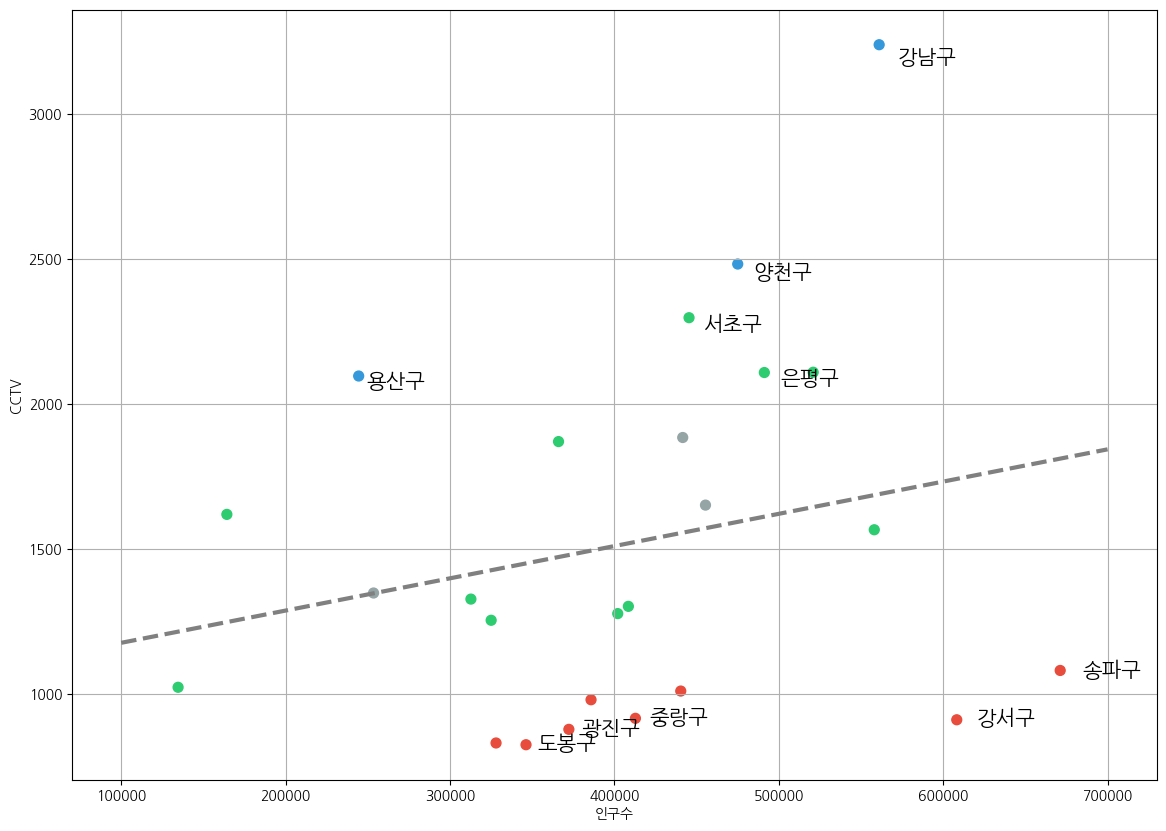

In [ ]:
drawGraph9()

데이터 저장
===

In [ ]:
data_result.to_csv("./data/01. CCTV_result.csv", sep = ",", encoding="utf-8")

In [ ]:
!ls ./data/

'01. CCTV_result.csv'  '01. Seoul_CCTV.csv'  '01. Seoul_Population.xls'
